Hello, this notebook will visualise the data

#### Reading the data as a dataframe

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
df_cp = pd.read_csv('/users/hussein/source/bladder_cancer/data/data_clinical_patient.csv')
df_mrna = pd.read_csv('/users/hussein/source/bladder_cancer/data/data_mrna_seq_v2_rsem.csv')


### data_clinical_patient (df_cp) visualisation

In [94]:
print(df_cp.shape)
print(df_cp.head(5))

(415, 38)
   Unnamed: 0                         #Patient Identifier  Subtype  \
0           0  #Identifier to uniquely specify a patient.  Subtype   
1           1                                     #STRING   STRING   
2           2                                          #1        1   
3           3                                  PATIENT_ID  SUBTYPE   
4           4                                TCGA-2F-A9KO     BLCA   

                TCGA PanCanAtlas Cancer Type Acronym  \
0  Text field to hold cancer type acronym used by...   
1                                             STRING   
2                                                  1   
3                                CANCER_TYPE_ACRONYM   
4                                               BLCA   

                          Other Patient ID  \
0  Legacy DMP patient identifier (DMPnnnn)   
1                                   STRING   
2                                        1   
3                         OTHER_PATIENT_ID   
4 

okay, it seems that the first 4 rows are basically the head. so we will need to delet the first 3 rows. also the first col, its just numbers and they are wrong

In [95]:
df_cp = df_cp.iloc[4:] # for the rows
df_cp = df_cp.iloc[: , 1:] # for the col



In [96]:
df_cp.shape
df_cp.head()

,#Patient Identifier,Subtype,TCGA PanCanAtlas Cancer Type Acronym,Other Patient ID,Diagnosis Age,Sex,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,Last Communication Contact from Initial Pathologic Diagnosis Date,Birth from Initial Pathologic Diagnosis Date,...,Patient Weight,In PanCan Pathway Analysis,Overall Survival Status,Overall Survival (Months),Disease-specific Survival status,Months of disease-specific survival,Disease Free Status,Disease Free (Months),Progression Free Status,Progress Free Survival (Months)
4,TCGA-2F-A9KO,BLCA,BLCA,DD3A6357-9087-44B2-9956-F981E0DE6F1C,63,Male,STAGE IV,6TH,678,-23323,...,65,Yes,1:DECEASED,24.1312424,1:DEAD WITH TUMOR,24.1312424,NaN,NaN,1:PROGRESSION,21.40250518
5,TCGA-2F-A9KP,BLCA,BLCA,65D1EAEC-28DB-4A41-A4DB-1A710FCB24AD,66,Male,STAGE IV,7TH,NaN,-24428,...,130,Yes,1:DECEASED,11.96699214,1:DEAD WITH TUMOR,11.96699214,NaN,NaN,1:PROGRESSION,11.27658875
6,TCGA-2F-A9KQ,BLCA,BLCA,25EAF3F9-C364-423C-AAAE-925E7B393AFC,69,Male,STAGE III,6TH,2886,-25259,...,72,Yes,0:LIVING,94.88115199,0:ALIVE OR DEAD TUMOR FREE,94.88115199,0:DiseaseFree,94.88115199,0:CENSORED,94.88115199
7,TCGA-2F-A9KR,BLCA,BLCA,F6D916B0-8E4C-49CB-A0D4-883908F3284F,59,Female,STAGE III,5TH,3148,-21848,...,80,Yes,1:DECEASED,104.6454285,1:DEAD WITH TUMOR,104.6454285,1:Recurred/Progressed,101.4564224,1:PROGRESSION,101.4564224
8,TCGA-2F-A9KT,BLCA,BLCA,BC6C516B-591E-4950-B6B0-DECAFA666F4E,83,Male,STAGE II,6TH,3314,-30520,...,80,Yes,0:LIVING,108.9522307,0:ALIVE OR DEAD TUMOR FREE,108.9522307,0:DiseaseFree,108.9522307,0:CENSORED,108.9522307


---

### data_mrna_seq_v2_rsem (df_mrna) visualisation

In [97]:
print(df_mrna.shape)
print(df_mrna.head(5))

(20531, 410)
   Unnamed: 0 Hugo_Symbol  Entrez_Gene_Id  TCGA-2F-A9KO-01  TCGA-2F-A9KP-01  \
0           0         NaN       100130426           0.0000           0.0000   
1           1         NaN       100133144          20.4373          16.1382   
2           2    UBE2Q2P2       100134869          37.8717          12.5759   
3           3     HMGB1P1           10357         123.0900         137.8860   
4           4         NaN           10431         702.0410         882.2310   

   TCGA-2F-A9KQ-01  TCGA-2F-A9KR-01  TCGA-2F-A9KT-01  TCGA-2F-A9KW-01  \
0           0.0000           0.0000           0.0000           0.0000   
1          13.3333          15.3523          14.0136           7.1159   
2          10.7742          42.5810          17.6427           2.3091   
3         104.6780         146.4530         142.9620         176.8770   
4         954.1030         487.2100         954.7770        1586.0300   

   TCGA-4Z-AA7M-01  ...  TCGA-ZF-AA4X-01  TCGA-ZF-AA51-01  TCGA-ZF-AA52-0

so have 410 patients and 20531 genetic data

---

#### Feature eng, adding the mean and SD

In [38]:
print(df_mrna.iloc[: , 2:])

       Entrez_Gene_Id  TCGA-2F-A9KO-01  TCGA-2F-A9KP-01  TCGA-2F-A9KQ-01  \
0           100130426           0.0000           0.0000           0.0000   
1           100133144          20.4373          16.1382          13.3333   
2           100134869          37.8717          12.5759          10.7742   
3               10357         123.0900         137.8860         104.6780   
4               10431         702.0410         882.2310         954.1030   
...               ...              ...              ...              ...   
20526          440590           5.8309          17.0620           1.8544   
20527           79699         697.9590        1526.4300        1571.1600   
20528            7791        4262.3900        3105.2900        3275.3800   
20529           23140        1787.7600        1467.7500         750.5800   
20530           26009         572.5950         860.5910         621.2330   

       TCGA-2F-A9KR-01  TCGA-2F-A9KT-01  TCGA-2F-A9KW-01  TCGA-4Z-AA7M-01  \
0         

#### claculating new features

In [62]:
df_mrna['mean'] = df_mrna.iloc[: , 2:].mean(axis=1)
df_mrna['sd'] = df_mrna.iloc[: , 2:].std(axis=1)
df_mrna['skew'] = df_mrna.iloc[: , 2:].skew(axis=1)



In [63]:
print(df_mrna['mean'].shape)
print(df_mrna['mean'])

(20531,)
0        245417.739037
1        245435.209589
2        245439.938971
3           183.926184
4          1193.829010
             ...      
20526      1106.862275
20527      1013.703338
20528      5041.944789
20529      1018.645934
20530       736.395397
Name: mean, Length: 20531, dtype: float64


Text(0, 0.5, 'mean')

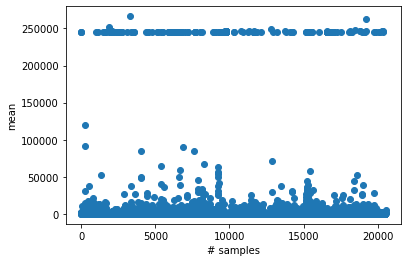

In [73]:
# classes = ['B', 'S']
scatter = plt.scatter(np.arange(0,len(df_mrna)), df_mrna['mean'] )
# plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.xlabel('# samples')
plt.ylabel('mean')

Text(0, 0.5, 'sd')

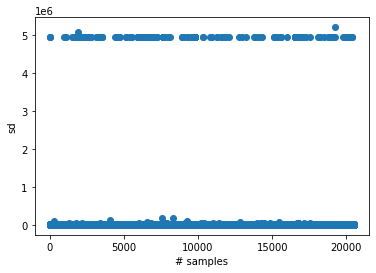

In [65]:
# classes = ['B', 'S']
scatter = plt.scatter(np.arange(0,len(df_mrna)), df_mrna['sd']  )
# plt.legend(handles=scatter.legend_elements()[0], labels=classes)

plt.xlabel('# samples')
plt.ylabel('sd')

Text(0, 0.5, 'skew')

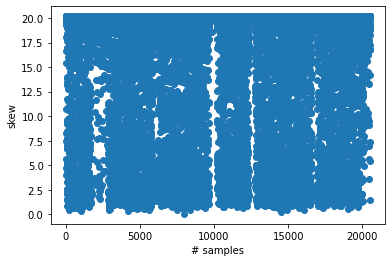

In [67]:
# classes = ['B', 'S']
scatter = plt.scatter(np.arange(0,len(df_mrna)), df_mrna['skew']  )
# plt.legend(handles=scatter.legend_elements()[0], labels=classes)

plt.xlabel('# samples')
plt.ylabel('skew')

(array([1.8578e+04, 1.0030e+03, 2.7100e+02, 1.0800e+02, 6.0000e+01,
        3.5000e+01, 1.9000e+01, 1.6000e+01, 8.0000e+00, 1.0000e+01,
        1.5000e+01, 1.1000e+01, 4.0000e+00, 5.0000e+00, 5.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 4.0000e+00, 3.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

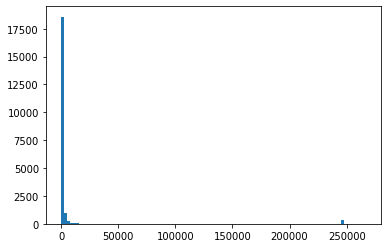

In [91]:
plt.hist(df_mrna['mean'],100)


(array([1.9408e+04, 7.4600e+02, 8.0000e+00, 6.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

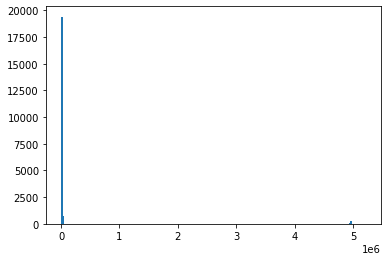

In [87]:
plt.hist(df_mrna['sd'],200)


(array([1.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 1.000e+01, 1.100e+01,
        2.900e+01, 2.800e+01, 5.600e+01, 6.200e+01, 7.400e+01, 7.700e+01,
        1.000e+02, 9.800e+01, 1.120e+02, 1.130e+02, 1.170e+02, 1.220e+02,
        1.050e+02, 9.300e+01, 9.400e+01, 1.090e+02, 9.600e+01, 1.100e+02,
        1.100e+02, 9.400e+01, 9.700e+01, 8.800e+01, 7.100e+01, 7.200e+01,
        7.600e+01, 6.900e+01, 7.600e+01, 6.900e+01, 7.000e+01, 6.100e+01,
        7.100e+01, 5.800e+01, 5.800e+01, 6.500e+01, 5.500e+01, 7.300e+01,
        5.600e+01, 6.000e+01, 5.300e+01, 5.600e+01, 5.700e+01, 4.400e+01,
        4.700e+01, 4.100e+01, 4.800e+01, 4.400e+01, 4.900e+01, 5.000e+01,
        4.400e+01, 4.600e+01, 4.500e+01, 4.700e+01, 4.000e+01, 3.300e+01,
        4.000e+01, 3.300e+01, 3.800e+01, 3.400e+01, 4.200e+01, 3.500e+01,
        3.300e+01, 3.500e+01, 4.200e+01, 3.200e+01, 3.000e+01, 5.100e+01,
        3.500e+01, 3.200e+01, 3.700e+01, 2.400e+01, 3.400e+01, 2.400e+01,
        2.300e+01, 2.900e+01, 2.700e+0

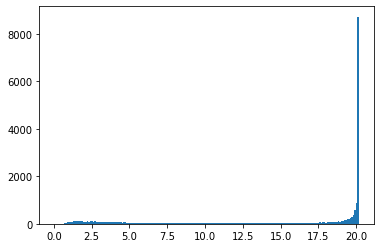

In [88]:
plt.hist(df_mrna['skew'],200)

In [ ]:
ataset = pd.read_csv(r'/content/Bladder_Cancer/data_mrna_seq_v2_rsem.txt', sep='\t')
Dataset.Hugo_Symbol.fillna(Dataset.Entrez_Gene_Id, inplace = True)
del Dataset['Entrez_Gene_Id']
RSEMDF = Dataset.set_index('Hugo_Symbol')
RSEMDF.columns = RSEMDF.columns.str.replace('-01','')
geneIDs = np.array(RSEMDF.index.values)
RSEMPatientID = list(RSEMDF)
# print(RSEMPatientID == ClinicalPatientID) # Returns False
ClinicalDF = ClinicalDF.drop(list(set(ClinicalPatientID) - set(RSEMPatientID)), axis = 0)
RSEMDF = RSEMDF.drop(list(set(RSEMPatientID) - set(ClinicalPatientID)), axis = 1)
ClinicalPatientID = list(ClinicalDF.index.values)
RSEMPatientID = list(RSEMDF)